## NAME : CHINTAN D. PATEL
### Problem Statment Solution
#logist regression task 

https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+%28AReM%29#
    
Task Logistic Regression
~~~~~~~~~~~~~~~~~~~~~~~~~~~
1. WAP to read folder name and make a label in the csv with folder name
2. Remove unneccesarry info in Automated way
3. No other algorithm must be used other than Logistic Regression
4. Try to utilize multiple solvers and make multiple models
5. Provide the best models
6. EDA and all must be done accordingly
Note: No manual approaches will be appreciated


In [1]:
import os
import pandas as pd

In [2]:
file_path = "C:\\DATA SCIENCE STUDY DRIVE\\iNeuron DataScience Course\\Class Practice Note\\DATE CLASS 39_09_10_2021 Problem Statment Solution"
list_folder = []
for file in os.listdir(file_path) :
    if file.endswith(".zip") or file.endswith(".pdf") or file.endswith(".ipynb") or file.endswith("ipynb_checkpoints"):
        pass
    else :
        list_folder.append(file)

In [3]:
list_folder

['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']

In [4]:
data = pd.DataFrame()
for folder in list_folder :
    for file in os.listdir(file_path+"\\"+folder):
        if file.endswith(".csv") :
            folder_data = pd.read_csv(file_path+"\\"+folder+"\\"+file , skiprows=4)
            folder_data["output"] = folder
            data = data.append(folder_data)
    

In [5]:
data.describe()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
count,41759.000000,41759.000000,41759.000000,41759.000000,41759.000000,41759.000000
mean,39.021121,1.472970,14.348414,1.513248,16.011230,1.631269
std,6.297484,2.055411,5.414506,1.644231,6.768319,1.642659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.250000,0.430000,11.500000,0.430000,12.000000,0.470000
50%,40.000000,0.500000,15.000000,0.830000,15.750000,1.000000
75%,44.000000,1.870000,18.000000,2.350000,19.250000,2.360000
max,56.250000,17.240000,35.000000,11.420000,40.330000,13.610000


In [6]:
data_final = data.copy()

In [7]:
data_final.head()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,output
0,0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,250,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,500,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,750,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,1000,39.50,0.50,24.00,0.00,33.00,0.0,bending1


In [8]:
data_final.describe()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
count,41759.000000,41759.000000,41759.000000,41759.000000,41759.000000,41759.000000
mean,39.021121,1.472970,14.348414,1.513248,16.011230,1.631269
std,6.297484,2.055411,5.414506,1.644231,6.768319,1.642659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.250000,0.430000,11.500000,0.430000,12.000000,0.470000
50%,40.000000,0.500000,15.000000,0.830000,15.750000,1.000000
75%,44.000000,1.870000,18.000000,2.350000,19.250000,2.360000
max,56.250000,17.240000,35.000000,11.420000,40.330000,13.610000


In [9]:
data_final["output"].unique()

array(['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing',
       'walking'], dtype=object)

## Step 01 Understanding Data With Pandas

In [10]:
data_final.dtypes

# Columns: time     object
avg_rss12          float64
var_rss12          float64
avg_rss13          float64
var_rss13          float64
avg_rss23          float64
var_rss23          float64
output              object
dtype: object

In [11]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import pickle 
import seaborn as sns

In [12]:
df = data_final.copy()

In [13]:
report = ProfileReport(df)

In [14]:
#report.to_widgets()

In [15]:
df.head()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,output
0,0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,250,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,500,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,750,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,1000,39.50,0.50,24.00,0.00,33.00,0.0,bending1


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.describe()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
count,38400.000000,38400.000000,38400.000000,38400.000000,38400.000000,38400.000000
mean,39.097199,1.546957,14.856303,1.563369,16.475992,1.686259
std,6.111628,2.106835,5.141382,1.669087,6.648668,1.665863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.250000,0.430000,12.000000,0.430000,12.670000,0.500000
50%,40.225000,0.500000,15.250000,0.870000,16.250000,1.090000
75%,44.000000,2.120000,18.250000,2.490000,19.500000,2.490000
max,56.250000,17.240000,35.000000,11.420000,40.330000,13.610000


In [18]:
df.isnull().sum()

# Columns: time      0
avg_rss12          480
var_rss12          480
avg_rss13          480
var_rss13          480
avg_rss23          480
var_rss23          480
output               0
dtype: int64

In [19]:
df.reset_index(inplace=True)

In [20]:
df.columns

Index(['index', '# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13',
       'var_rss13', 'avg_rss23', 'var_rss23', 'output'],
      dtype='object')

In [21]:
df.drop("index" , axis = 1 , inplace = True)

In [22]:
df.columns

Index(['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23', 'output'],
      dtype='object')

In [23]:
df.head()

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,output
0,0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,250,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,500,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,750,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,1000,39.50,0.50,24.00,0.00,33.00,0.0,bending1


In [24]:
df.describe()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
count,38400.000000,38400.000000,38400.000000,38400.000000,38400.000000,38400.000000
mean,39.097199,1.546957,14.856303,1.563369,16.475992,1.686259
std,6.111628,2.106835,5.141382,1.669087,6.648668,1.665863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.250000,0.430000,12.000000,0.430000,12.670000,0.500000
50%,40.225000,0.500000,15.250000,0.870000,16.250000,1.090000
75%,44.000000,2.120000,18.250000,2.490000,19.500000,2.490000
max,56.250000,17.240000,35.000000,11.420000,40.330000,13.610000


In [25]:
df.shape

(38880, 8)

## Step 02 : Replacing missing values with median

In [26]:
def one_hot_coding(df):
    for feature in df.columns:
        df[feature] = np.where(df[feature].isnull() == True , df[feature].median() , df[feature])
    return df

In [27]:
df_input = one_hot_coding(df.drop(["output","# Columns: time"], axis =1))

In [28]:
df_input.describe()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
count,38880.000000,38880.000000,38880.000000,38880.000000,38880.000000,38880.000000
mean,39.111123,1.534031,14.861164,1.554809,16.473202,1.678897
std,6.075061,2.096979,5.109731,1.660518,6.607545,1.656857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.500000,0.430000,12.000000,0.430000,12.750000,0.500000
50%,40.225000,0.500000,15.250000,0.870000,16.250000,1.090000
75%,44.000000,2.120000,18.250000,2.450000,19.500000,2.450000
max,56.250000,17.240000,35.000000,11.420000,40.330000,13.610000


In [29]:
df_input.isnull().sum()

avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
dtype: int64

In [30]:
df_notnull = df_input.join(df[["# Columns: time","output"]] , how = "left")

In [31]:
df_notnull.head()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,# Columns: time,output
0,39.25,0.43,22.75,0.43,33.75,1.3,0,bending1
1,39.25,0.43,23.00,0.00,33.00,0.0,250,bending1
2,39.25,0.43,23.25,0.43,33.00,0.0,500,bending1
3,39.50,0.50,23.00,0.71,33.00,0.0,750,bending1
4,39.50,0.50,24.00,0.00,33.00,0.0,1000,bending1


In [32]:
df_notnull.describe()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
count,38880.000000,38880.000000,38880.000000,38880.000000,38880.000000,38880.000000
mean,39.111123,1.534031,14.861164,1.554809,16.473202,1.678897
std,6.075061,2.096979,5.109731,1.660518,6.607545,1.656857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.500000,0.430000,12.000000,0.430000,12.750000,0.500000
50%,40.225000,0.500000,15.250000,0.870000,16.250000,1.090000
75%,44.000000,2.120000,18.250000,2.450000,19.500000,2.450000
max,56.250000,17.240000,35.000000,11.420000,40.330000,13.610000


In [33]:
#ProfileReport(df_notnull)

In [34]:
df_notnull.drop_duplicates(inplace=True)

In [35]:
df_notnull.describe()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
count,38880.000000,38880.000000,38880.000000,38880.000000,38880.000000,38880.000000
mean,39.111123,1.534031,14.861164,1.554809,16.473202,1.678897
std,6.075061,2.096979,5.109731,1.660518,6.607545,1.656857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.500000,0.430000,12.000000,0.430000,12.750000,0.500000
50%,40.225000,0.500000,15.250000,0.870000,16.250000,1.090000
75%,44.000000,2.120000,18.250000,2.450000,19.500000,2.450000
max,56.250000,17.240000,35.000000,11.420000,40.330000,13.610000


## Step 03 : check outliers using boxplot

In [36]:
data = df_notnull.copy()

In [37]:
data['# Columns: time'] = pd.to_numeric(data['# Columns: time'],errors='coerce')


In [38]:
data.dtypes

avg_rss12          float64
var_rss12          float64
avg_rss13          float64
var_rss13          float64
avg_rss23          float64
var_rss23          float64
# Columns: time    float64
output              object
dtype: object

#### Removing Time columns which are irrellevent to label 

In [39]:
data = data.drop("# Columns: time" , axis = 1)

In [40]:
data.head()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,output
0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,39.50,0.50,24.00,0.00,33.00,0.0,bending1


<AxesSubplot:>

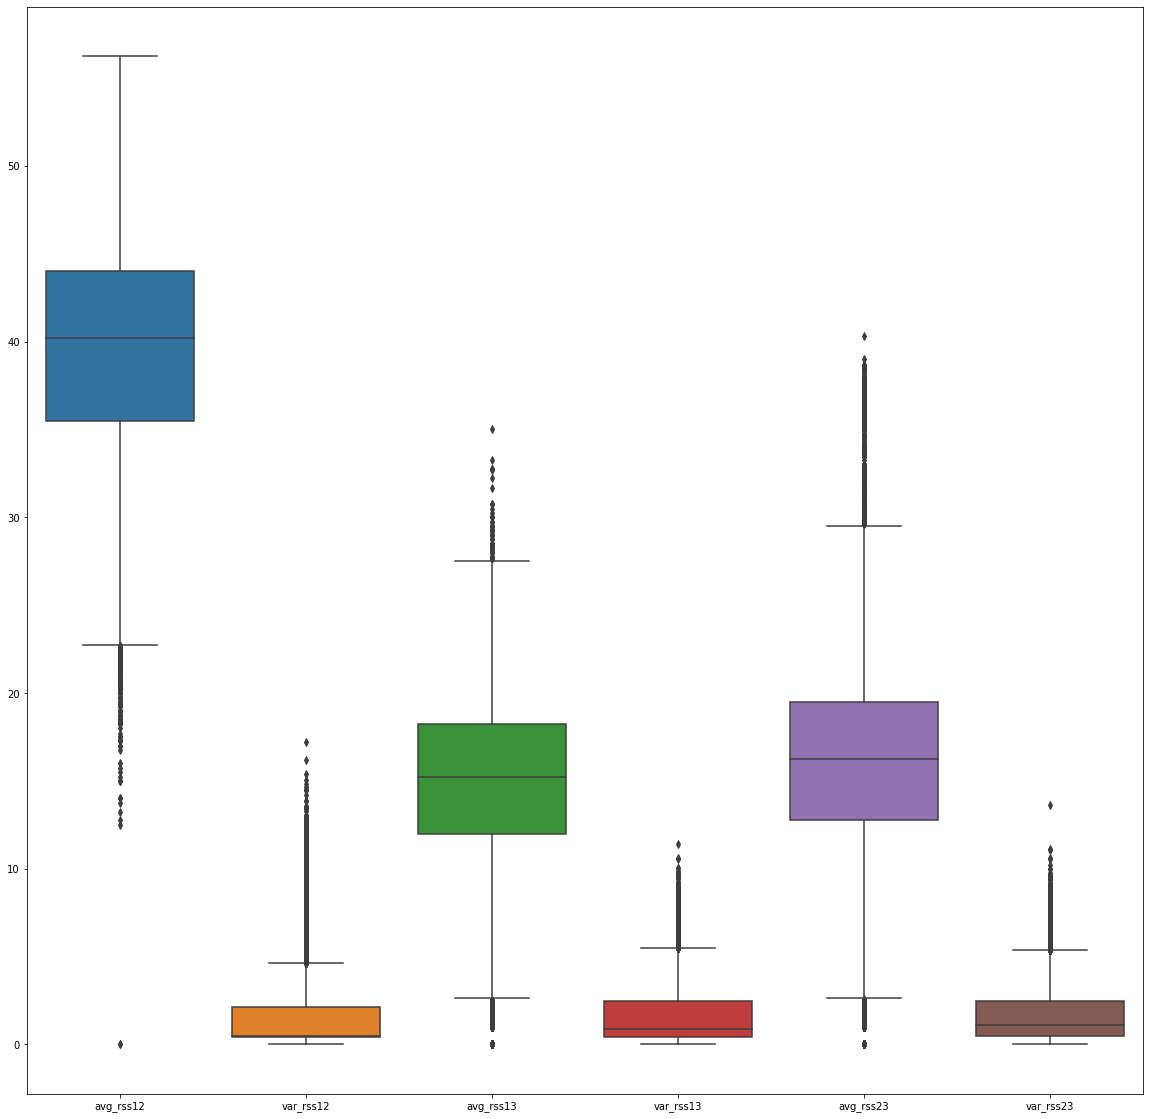

In [41]:
fig , ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = data.drop("output" ,axis = 1) , ax = ax)

In [42]:
def outlier_removal(data):
        def outlier_limits(col):
            Q3, Q1 = col.quantile([0.75,0.25])
            IQR= Q3-Q1
            UL= Q3+1.5*IQR
            LL= Q1-1.5*IQR
            return UL, LL

        for column in data.columns:
            if data[column].dtype == 'float64':
                UL, LL= outlier_limits(data[column])
                data[column]= np.where((data[column] > UL) | (data[column] < LL),np.nan, data[column])

        return data

In [43]:
outlier_removal(data)

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,output
0,39.25,0.43,22.75,0.43,NaN,1.30,bending1
1,39.25,0.43,23.00,0.00,NaN,0.00,bending1
2,39.25,0.43,23.25,0.43,NaN,0.00,bending1
3,39.50,0.50,23.00,0.71,NaN,0.00,bending1
4,39.50,0.50,24.00,0.00,NaN,0.00,bending1
...,...,...,...,...,...,...,...
38875,31.50,1.66,12.50,3.20,14.25,4.44,walking
38876,27.33,1.25,11.33,0.94,20.00,4.00,walking
38877,37.80,NaN,14.20,2.48,17.25,0.83,walking
38878,33.75,1.30,15.75,5.21,16.50,2.69,walking


In [44]:
data.isnull().sum()

avg_rss12     334
var_rss12    3924
avg_rss13     877
var_rss13    1318
avg_rss23    3170
var_rss23    1671
output          0
dtype: int64

In [45]:
data.dropna(inplace=True)

In [46]:
data.head()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,output
414,42.25,0.43,22.50,1.50,29.25,0.83,bending1
415,42.00,0.00,21.00,0.00,29.33,0.47,bending1
421,42.00,0.00,19.25,0.43,29.50,0.50,bending1
423,42.00,0.00,18.75,0.43,29.50,0.50,bending1
465,42.00,0.00,24.00,0.00,29.33,0.94,bending1


In [47]:
data.describe()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
count,28754.000000,28754.000000,28754.000000,28754.000000,28754.000000,28754.000000
mean,39.862530,0.939407,14.746749,1.262721,15.752220,1.388498
std,5.800626,1.133090,4.712876,1.313747,4.841889,1.234360
min,22.750000,0.000000,2.670000,0.000000,2.670000,0.000000
25%,36.500000,0.000000,12.000000,0.430000,12.500000,0.500000
50%,41.500000,0.500000,15.250000,0.830000,16.000000,0.940000
75%,44.500000,1.250000,18.000000,1.890000,19.000000,1.920000
max,56.250000,4.640000,27.500000,5.480000,29.500000,5.370000


<AxesSubplot:>

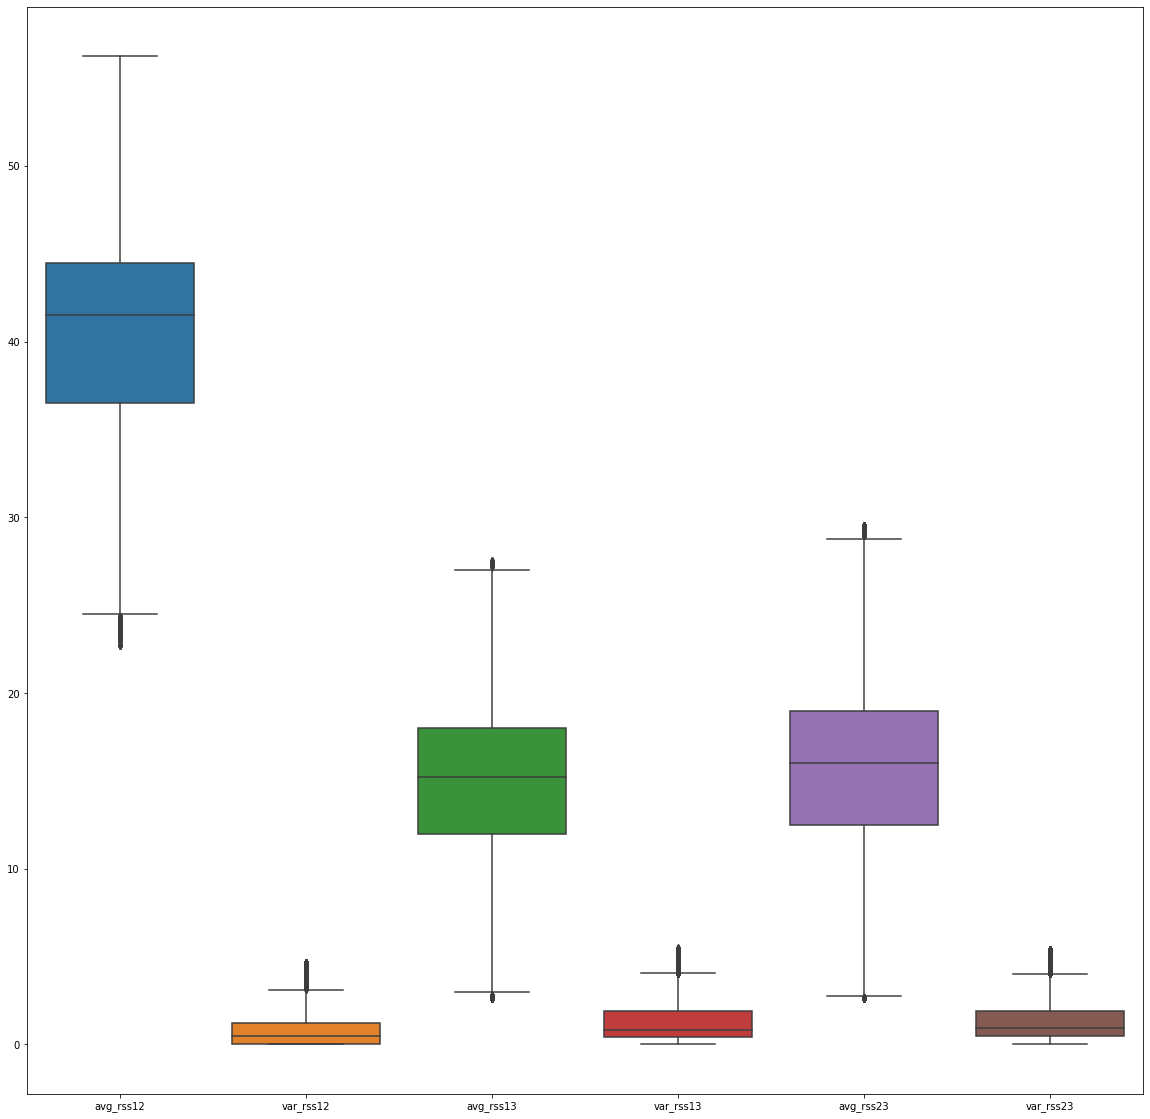

In [48]:
fig , ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = data.drop("output" ,axis = 1) , ax = ax)

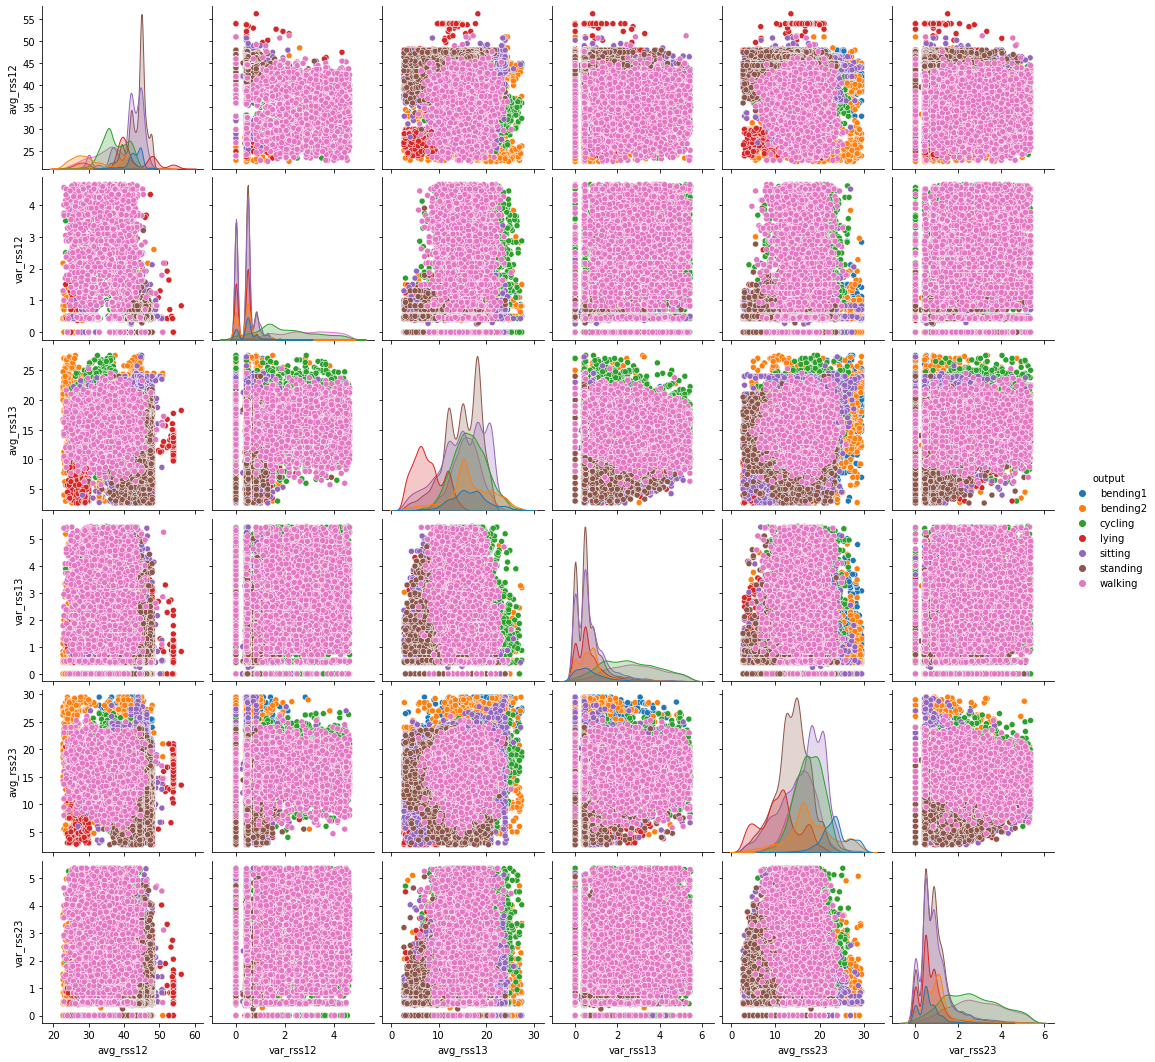

In [49]:
sns.pairplot(data , hue = "output")

## Step 04 : Identify feature and label

In [50]:
data_process = data.copy()

In [51]:
data_process["output"].unique()

array(['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing',
       'walking'], dtype=object)

In [52]:
output = list(data_process["output"].unique())
output

['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']

In [53]:
dictionary = {k:i for i,k in enumerate(output)}
dictionary

{'bending1': 0,
 'bending2': 1,
 'cycling': 2,
 'lying': 3,
 'sitting': 4,
 'standing': 5,
 'walking': 6}

In [54]:
data_process["numeric_output"] = data_process["output"].map(dictionary)

In [55]:
data_process.head()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,output,numeric_output
414,42.25,0.43,22.50,1.50,29.25,0.83,bending1,0
415,42.00,0.00,21.00,0.00,29.33,0.47,bending1,0
421,42.00,0.00,19.25,0.43,29.50,0.50,bending1,0
423,42.00,0.00,18.75,0.43,29.50,0.50,bending1,0
465,42.00,0.00,24.00,0.00,29.33,0.94,bending1,0


In [56]:
px = data_process.drop(["numeric_output" ,"output" ] , axis = 1)
y = data_process.numeric_outut


In [57]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import pickle 
import seaborn as sns

## Standerdization of Dataset

In [58]:
scalar = StandardScaler()

In [59]:
x_scaled = scalar.fit_transform(x)

In [60]:
x_scaled

array([[ 0.41159546, -0.44958151,  1.64514971,  0.18061579,  2.78775769,
        -0.45246763],
       [ 0.36849591, -0.8290814 ,  1.32686716, -0.9611764 ,  2.80428046,
        -0.74412177],
       [ 0.36849591, -0.8290814 ,  0.95553753, -0.63386264,  2.83939133,
        -0.71981726],
       ...,
       [-2.16058531,  0.27411596, -0.72499429, -0.24565329,  0.87731323,
         2.11570919],
       [-1.05378903,  0.31824386,  0.21287827,  3.00464849,  0.15444235,
         1.05441214],
       [-1.23997906,  1.89802248,  0.83246828, -0.60341484, -0.36189399,
         1.43518284]])

<AxesSubplot:>

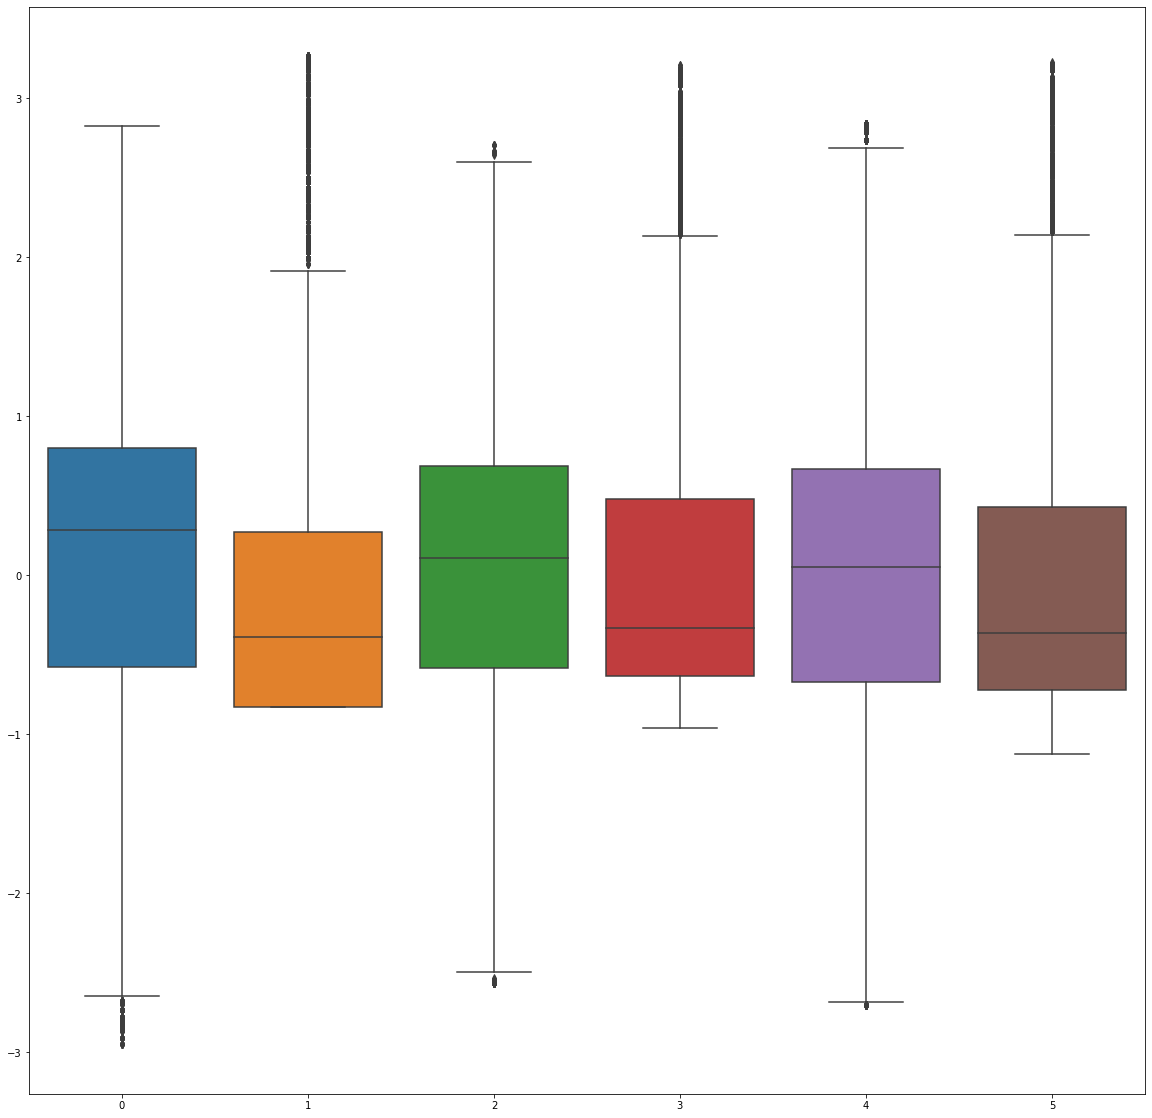

In [61]:
fig , ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = pd.DataFrame(x_scaled), ax = ax )

In [62]:
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])


In [63]:
vif_score(x)

,FEATURE,VIF_SCORE
0,avg_rss12,1.197228
1,var_rss12,1.871371
2,avg_rss13,1.177785
3,var_rss13,1.818835
4,avg_rss23,1.163696
5,var_rss23,1.803736


In [64]:
x_train , x_test , y_train , y_test = train_test_split(x_scaled ,  y  , test_size = .20 , random_state   =  0 )

In [65]:
logi1  = LogisticRegression(verbose=1 ,n_jobs=4, penalty = 'l2',solver='lbfgs' )
logi2  = LogisticRegression(verbose=1 ,n_jobs=4 ,penalty = 'l1',solver='liblinear' )
logi3  = LogisticRegression(verbose=1 ,n_jobs=4 ,penalty = 'l2',solver='liblinear' )
logi4  = LogisticRegression(verbose=1 ,n_jobs=4 ,solver='newton-cg' )
logi5  = LogisticRegression(verbose=1 ,n_jobs=4 ,solver='liblinear' )
logi6  = LogisticRegression(verbose=1 ,n_jobs=4 ,penalty = 'none',solver='sag' )


In [66]:
logi1.fit(x_train,y_train)
logi2.fit(x_train,y_train)
logi3.fit(x_train,y_train)
logi4.fit(x_train,y_train)
logi5.fit(x_train,y_train)
logi6.fit(x_train,y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    3.5s finished
C:\Users\CHINTAN PATEL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


[LibLinear]

C:\Users\CHINTAN PATEL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


[LibLinear]

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    3.7s finished
C:\Users\CHINTAN PATEL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


[LibLinear]convergence after 36 epochs took 0 seconds


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.5s finished


LogisticRegression(n_jobs=4, penalty='none', solver='sag', verbose=1)

## ROC And AUC

In [67]:
y_predi_logi1 = logi1.predict_proba(x_test)
y_predi_logi2 = logi2.predict_proba(x_test)
y_predi_logi3 = logi3.predict_proba(x_test)
y_predi_logi4 = logi4.predict_proba(x_test)
y_predi_logi5 = logi5.predict_proba(x_test)
y_predi_logi6 = logi6.predict_proba(x_test)

In [68]:
from sklearn.metrics import roc_curve , auc , roc_auc_score

In [69]:
auc_logi1 = roc_auc_score(y_test, y_predi_logi1 , multi_class="ovr")
auc_logi2 = roc_auc_score(y_test, y_predi_logi2 , multi_class="ovr")
auc_logi3 = roc_auc_score(y_test, y_predi_logi3 , multi_class="ovr")
auc_logi4 = roc_auc_score(y_test, y_predi_logi4,multi_class="ovr")
auc_logi5 = roc_auc_score(y_test, y_predi_logi5,multi_class="ovr")
auc_logi6 = roc_auc_score(y_test, y_predi_logi6,multi_class="ovr")



In [70]:
auc_logi1

0.9159555445948399

In [71]:
auc_logi2

0.9089640518306351

In [72]:
auc_logi3

0.9089312684212066

In [73]:
auc_logi4

0.9159542494514312

In [74]:
auc_logi5

0.9089312684212066

In [75]:
auc_logi6

0.9159603950943255

#### model 6 is best auc score means it has balanced between tpr and fpr

In [76]:
logi_classifier  = LogisticRegression(verbose=1 ,n_jobs=4 ,penalty = 'none',solver='sag' )
logi_classifier.fit(x_train,y_train)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 39 epochs took 1 seconds


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.5s finished


LogisticRegression(n_jobs=4, penalty='none', solver='sag', verbose=1)

In [77]:
y_predict = logi_classifier.predict(x_test)

In [78]:
logi_classifier.score(x_test,y_test)

0.6103286384976526

In [79]:
from sklearn.metrics import accuracy_score , confusion_matrix , roc_auc_score, roc_curve

In [80]:
confusion_matrix(y_test,y_predict)

array([[110,   2,  11,   0, 104,   3,   0],
       [ 18, 277,  22,  20, 128,   2,   6],
       [  0,  21, 605,   1,  74,  18, 203],
       [  0,  30,   2, 501,  20,  90,   2],
       [ 56,  87,  43,  98, 654, 376,   2],
       [  4,   0,  32,  65, 373, 976,   5],
       [  1,  10, 302,   0,   8,   2, 387]], dtype=int64)

<AxesSubplot:>

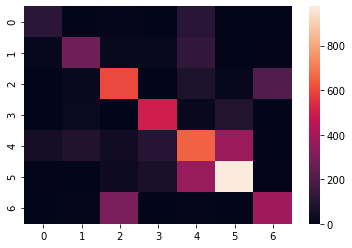

In [81]:
sns.heatmap(confusion_matrix(y_test,y_predict) )

In [82]:
confusion_metrix = pd.DataFrame(confusion_matrix(y_test,y_predict))

In [83]:
confusion_metrix

,0,1,2,3,4,5,6
0,110,2,11,0,104,3,0
1,18,277,22,20,128,2,6
2,0,21,605,1,74,18,203
3,0,30,2,501,20,90,2
4,56,87,43,98,654,376,2
5,4,0,32,65,373,976,5
6,1,10,302,0,8,2,387


In [84]:
confusion_metrix.set_axis(data["output"].unique() , axis = 1 , inplace=True)

In [85]:
confusion_metrix.set_axis(data["output"].unique() , axis = 0, inplace=True)

In [86]:
confusion_metrix   #vertical is true values
                   #horizontal is predicted values

,bending1,bending2,cycling,lying,sitting,standing,walking
bending1,110,2,11,0,104,3,0
bending2,18,277,22,20,128,2,6
cycling,0,21,605,1,74,18,203
lying,0,30,2,501,20,90,2
sitting,56,87,43,98,654,376,2
standing,4,0,32,65,373,976,5
walking,1,10,302,0,8,2,387


In [87]:
confusion_metrix["Total_horizontal"] = confusion_metrix.apply(lambda x : sum(x) , axis = 1)

In [88]:
confusion_metrix

,bending1,bending2,cycling,lying,sitting,standing,walking,Total_horizontal
bending1,110,2,11,0,104,3,0,230
bending2,18,277,22,20,128,2,6,473
cycling,0,21,605,1,74,18,203,922
lying,0,30,2,501,20,90,2,645
sitting,56,87,43,98,654,376,2,1316
standing,4,0,32,65,373,976,5,1455
walking,1,10,302,0,8,2,387,710


In [89]:
confusion_metrix["Total_vertical"] = confusion_metrix.apply(lambda x : sum(x) , axis = 0)

In [90]:
confusion_metrix

,bending1,bending2,cycling,lying,sitting,standing,walking,Total_horizontal,Total_vertical
bending1,110,2,11,0,104,3,0,230,189
bending2,18,277,22,20,128,2,6,473,427
cycling,0,21,605,1,74,18,203,922,1017
lying,0,30,2,501,20,90,2,645,685
sitting,56,87,43,98,654,376,2,1316,1361
standing,4,0,32,65,373,976,5,1455,1467
walking,1,10,302,0,8,2,387,710,605


In [91]:
confusion_metrix["diagonal"] = np.diag(confusion_metrix)

In [92]:
confusion_metrix

,bending1,bending2,cycling,lying,sitting,standing,walking,Total_horizontal,Total_vertical,diagonal
bending1,110,2,11,0,104,3,0,230,189,110
bending2,18,277,22,20,128,2,6,473,427,277
cycling,0,21,605,1,74,18,203,922,1017,605
lying,0,30,2,501,20,90,2,645,685,501
sitting,56,87,43,98,654,376,2,1316,1361,654
standing,4,0,32,65,373,976,5,1455,1467,976
walking,1,10,302,0,8,2,387,710,605,387


In [93]:
confusion_metrix["Recall"] =confusion_metrix["diagonal"] /  confusion_metrix["Total_vertical"]

In [94]:
confusion_metrix["Precision"] =confusion_metrix["diagonal"] /  confusion_metrix["Total_horizontal"]

In [95]:
confusion_metrix

,bending1,bending2,cycling,lying,sitting,standing,walking,Total_horizontal,Total_vertical,diagonal,Recall,Precision
bending1,110,2,11,0,104,3,0,230,189,110,0.582011,0.478261
bending2,18,277,22,20,128,2,6,473,427,277,0.648712,0.585624
cycling,0,21,605,1,74,18,203,922,1017,605,0.594887,0.656182
lying,0,30,2,501,20,90,2,645,685,501,0.731387,0.776744
sitting,56,87,43,98,654,376,2,1316,1361,654,0.480529,0.496960
standing,4,0,32,65,373,976,5,1455,1467,976,0.665303,0.670790
walking,1,10,302,0,8,2,387,710,605,387,0.639669,0.545070


In [96]:
true_predicted = np.sum(confusion_metrix["diagonal"])

In [97]:
Total_data = np.sum(np.sum(confusion_metrix.iloc[0:7,0:7]))

In [98]:
accuracy = true_predicted / Total_data

In [99]:
accuracy

0.6103286384976526

Accuracy of model is 60%